In [8]:
import requests
from bs4 import BeautifulSoup
import regex as re

In [19]:
address = '1038 academy ave, cincinnati, oh'

street = address.split(',')[0]
city = address.split(',')[1].strip()
state = address.split(',')[2].strip()
address0 = street.replace(' ', '-') + '-' + city.replace(' ', '-') + '-' + state.lower().replace(' ',  '-')
address0

'1038-academy-ave-cincinnati-oh'

In [20]:

request_headers = {
    'accept': 
    'text/html, application/xhtml+xml, application/xml;q=0.9, image/webp, image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US, en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
with requests.Session() as session:
    url= "https://www.google.com/search?q=" + street.replace(' ', '+') + "+" + city.replace(' ', '+') + "+" + state + '+' + 'redfin'
    response = session.get(url, headers = request_headers)
print(url)

https://www.google.com/search?q=1038+academy+ave+cincinnati+oh+redfin


<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>1038 academy ave cincinnati oh redfin - Google Search</title><script nonce="9h2LemmyENJixzJ4pGvVlg==">(function(){window.google={kEI:'Htf9YO7NJpGo5NoP_u6O4AY',kEXPI:'31',kBL:'k8M4'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="&cshid="+f._cshid);c=c||"/"+(g||"gen_204")+"?atyp=i&ct="+a+"&cad="+b+e+"&zx="+Date.now()+
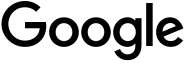

In [21]:
soup = BeautifulSoup(response.content, 'html.parser')
soup

In [22]:
    request_headers = {
        'accept': 
        'text/html, application/xhtml+xml, application/xml;q=0.9, image/webp, image/apng,*/*;q=0.8',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US, en;q=0.8',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
    }
    with requests.Session() as session:
        google = "https://www.google.com/search?q=" + street.replace(' ', '+') + "+" + city.replace(' ', '+') + "+" + state + '+' + 'redfin'
        googleResponse = session.get(google, headers = request_headers)

    googleSoup = BeautifulSoup(googleResponse.content, 'html.parser')
    productDivs = googleSoup.findAll(attrs={'class' : 'yuRUbf'})
    divs = []
    for div in productDivs:
        divs.append(div.find('a')['href'])
    print(divs)
    filtered = [x for x in divs if 'redfin' in x]
    streetString = street.split(' ')[:2]
    streetString = '-'.join(streetString)
    url = [x for x in filtered if streetString in x]
    print(url)
    url = url[0]

['https://www.redfin.com/OH/Cincinnati/1038-Academy-Ave-45205/home/100969901', 'https://www.redfin.com/OH/Cincinnati/1050-Academy-Ave-45205/home/76170395', 'https://www.zillow.com/homedetails/1038-Academy-Ave-Cincinnati-OH-45205/34240311_zpid/', 'https://www.realtor.com/realestateandhomes-detail/1038-Academy-Ave_Cincinnati_OH_45205_M40489-79579', 'https://www.coldwellbankerhomes.com/oh/cincinnati/1038-academy-ave/pid_39657207/', 'http://eome.lorenzoaiello.it/zillow-map-near-me.html', 'https://www.apartmentguide.com/neighborhoods/Ohio/Cincinnati/East-Price-Hill/1-beds-1z141xt/', 'https://ufdc.ufl.edu/AA00054397/00870', 'https://www.trulia.com/p/oh/cincinnati/1038-academy-ave-cincinnati-oh-45205--2046925344', 'https://www.finderinv.com/ucp/florida-unclaimed-property-list-32.pdf']
[]


IndexError: list index out of range

In [23]:
with requests.Session() as session:
    response = session.get(url, headers = request_headers)

InvalidURL: Failed to parse: []

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Where can I get the best coffee - Google Search</title><script nonce="xU0qaNHEND8tewMavPl/6Q==">(function(){window.google={kEI:\'Jdf9YPyCLNLQ5NoP-J6vsAw\',kEXPI:\'31\',kBL:\'k8M4\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nf
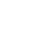
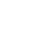
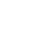
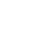
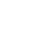
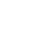
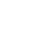
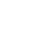
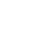
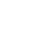
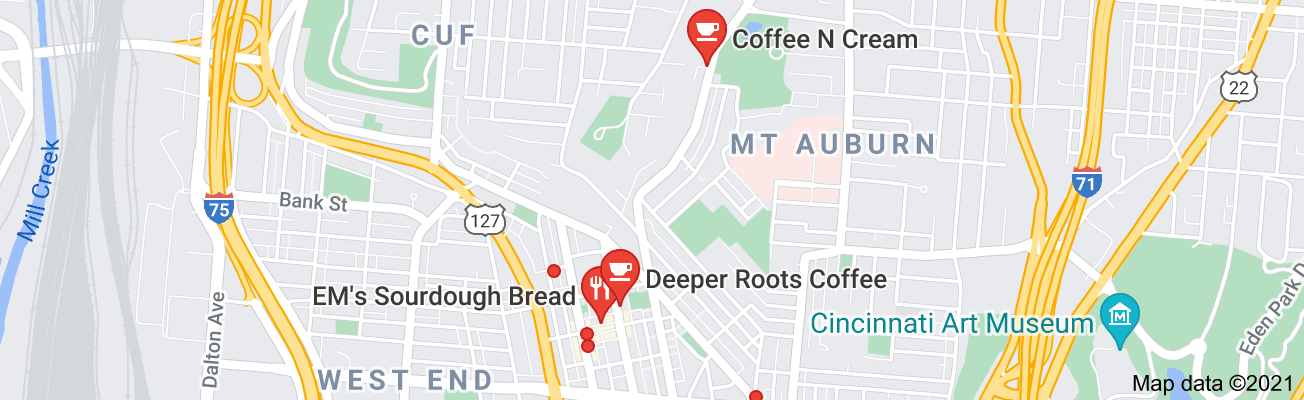
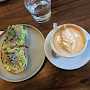
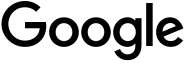

In [24]:
import urllib.request

url = 'https://google.com/search?q=Where+can+I+get+the+best+coffee'

# Perform the request
request = urllib.request.Request(url)

# Set a normal User Agent header, otherwise Google will block the request.
request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
raw_response = urllib.request.urlopen(request).read()

# Read the repsonse as a utf-8 string
html = raw_response.decode("utf-8")
html

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>1038 academy ave cincinnati oh redfin - Google Search</title><script nonce="9h2LemmyENJixzJ4pGvVlg==">(function(){window.google={kEI:'Htf9YO7NJpGo5NoP_u6O4AY',kEXPI:'31',kBL:'k8M4'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="&cshid="+f._cshid);c=c||"/"+(g||"gen_204")+"?atyp=i&ct="+a+"&cad="+b+e+"&zx="+Date.now()+
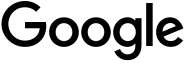

In [25]:
soup = BeautifulSoup(response.content, 'html.parser')
print(str(soup))

In [26]:
from bs4 import BeautifulSoup

# The code to get the html contents here.

soup = BeautifulSoup(html, 'html.parser')

# Find all the search result divs
divs = soup.select("#search div.g")
for div in divs:
    # Search for a h3 tag
    results = div.select("h3")

    # Check if we have found a result
    if (len(results) >= 1):

        # Print the title
        h3 = results[0]
        print(h3.get_text())

20 Best Coffee Brands 2021 — Best Brands of Coffee - Delish
The 12 Best Coffee Brands in 2021 - The Spruce Eats
The 15 Best Coffee Beans To Buy in 2021, Reviewed | The ...
9 Best Coffee Brands of 2021 - Best Coffee Beans
The Best Coffee Beans 2021 | Where To Get The Best Whole ...
Cincinnati Coffee Shops - The Ultimate List for Coffee Lovers!
The Best Coffee Beans in the World (2021) - Espresso ...
Cincinnati Coffee Shops - 7 You Must Try | Atlas Coffee Club
TOP-RATED COFFEES (94+ POINTS) - COFFEE REVIEW


In [27]:
beds = [td.findAll('div') for td in soup.findAll('div', attrs={'class': 'stat-block beds-section'})][0][0]
beds = beds.text
beds = int(beds)
beds

IndexError: list index out of range

In [49]:
baths = 2
if (isinstance(baths, float) == True):
    baths = float(baths)
elif (isinstance(baths, int) == False):
    baths = int(baths)
baths

2

In [18]:
baths = ([td.findAll('div') for td in soup.findAll('div', attrs={'class': 'stat-block baths-section'})][0][0].text)
baths

IndexError: list index out of range

In [65]:
sqft = int([td.findAll('span') for td in soup.findAll('div', attrs={'class': 'stat-block sqft-section'})][0][0].text.replace(',', ''))
sqft

1735

In [66]:
price = float([td.findAll('div') for td in soup.findAll('div', attrs={'class': 'stat-block price-section'})][0][0].text.replace('$','').replace(',', ''))
price

300000.0

In [67]:
propertyTaxes = float(soup.find_all('span', {'class':'Row--content text-right'})[1].text.replace('$','').replace(',',''))
propertyTaxes

448.0

In [68]:
hoa = float(soup.find_all('span', {'class':'Row--content text-right'})[2].text.replace('$','').replace(',',''))
hoa

138.0

In [69]:
homeInsurance = float(soup.find_all('span', {'class':'Row--content text-right'})[3].text.replace('$','').replace(',',''))
homeInsurance

IndexError: list index out of range

In [70]:
propertyTaxes

448.0

In [71]:
divs = []
divs.append(soup.find('span', {'class': 'entryItemContent'}))
su = 'a'
a = [i for i in divs if su in i]
print(a)

[]


In [74]:
a = soup.find_all('span', attrs={'class': 'entryItemContent'})
a = str(a).replace('<span class=', '').replace('"', '').replace('entryItemContent>', '').replace('<span>', '')
a = a.split('</span>')
taxes = [x for x in a if 'Taxes' in x][0]
taxes = taxes.replace(',', '')
a = taxes.split(':')[0]
a = str(a).replace(' ', '')
tax = [int(i) for i in taxes.split() if i.isdigit()]
if a == 'Taxes(Annual)':
    temp = re.findall(r'\d+', taxes)
    res = list(map(int, temp))
    res = float(res[0])
    propertyTaxes = round((res / 12), 2)
elif a == 'Semi-AnnualTaxes':
    temp = re.findall(r'\d+', taxes)
    res = list(map(int, temp))
    res = float(res[0])
    propertyTaxes = round((res / 6), 2)

IndexError: list index out of range

In [75]:
a = soup.find_all('span', attrs={'class': 'entryItemContent'})
a = str(a).replace('<span class=', '').replace('"', '').replace('entryItemContent>', '').replace('<span>', '')
a = a.split('</span>')
a = [x for x in a if 'Association' in x][0]
hoa = hoa.replace(',', '').split(':')[0]
hoa = str(hoa).replace(' ', '')
if hoa == 'Association/CondoFee':
    temp = re.findall(r'\d+', a)
    res = list(map(int, temp))
    res = float(res[0])
    hoa = res / 12
else:
    hoa = 0

IndexError: list index out of range